# Project: Wrangling and Analyze Data

#### 

## Data Gathering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_01 = pd.read_csv('twitter_archive_enhanced.csv')

In [3]:
df_01.shape

(2356, 17)

In [4]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

image_url = requests.get(url, allow_redirects=True)

with open('image-predictions.tsv', mode='wb')as file:

    file.write(image_url.content)

In [5]:
df_02 = pd.read_csv('image-predictions.tsv', sep = '\t')
df_02.shape

(2075, 12)

In [6]:
import tweepy
import json

consumer_key = "HIDDEN"
consumer_secret = "HIDDEN"
access_token = "HIDDEN"
access_token_secret = "HIDDEN"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

with open('tweet_json.txt', 'r') as file:

    df_03 = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])

    for line in file:
      
        tweet = json.loads(line)

        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
    
        df_03 = df_03.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count}, ignore_index=True)

C:\Users\daiva\AppData\Local\Temp\ipykernel_18172\641311917.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_03 = df_03.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count}, ignore_index=True)
C:\Users\daiva\AppData\Local\Temp\ipykernel_18172\641311917.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_03 = df_03.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count}, ignore_index=True)
C:\Users\daiva\AppData\Local\Temp\ipykernel_18172\641311917.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_03 = df_03.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count}, ignore_index=True)
C:\U

In [7]:
df_03.shape

(2354, 3)

## Assessing Data

In [8]:
df_01

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
df_01["timestamp"]

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2356, dtype: object

In [11]:
list(df_01)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [12]:
duplicates = df_01.groupby(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
                         'timestamp', 'source', 'text', 'retweeted_status_id', 
                         'retweeted_status_user_id', 'retweeted_status_timestamp', 
                         'expanded_urls', 'rating_numerator', 'rating_denominator', 
                         'name', 'doggo', 'floofer', 'pupper', 'puppo']).size()

duplicates[duplicates > 1].sum()

0

In [13]:
for columns in df_01.columns:
    duplicates = df_01[columns].duplicated()
    print(f"Duplicates in {columns}:")
    print(df_01[duplicates][columns])

Duplicates in tweet_id:
Series([], Name: tweet_id, dtype: int64)
Duplicates in in_reply_to_status_id:
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
        ..
2351   NaN
2352   NaN
2353   NaN
2354   NaN
2355   NaN
Name: in_reply_to_status_id, Length: 2278, dtype: float64
Duplicates in in_reply_to_user_id:
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
        ..
2351   NaN
2352   NaN
2353   NaN
2354   NaN
2355   NaN
Name: in_reply_to_user_id, Length: 2324, dtype: float64
Duplicates in timestamp:
Series([], Name: timestamp, dtype: object)
Duplicates in source:
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
5       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a 

In [14]:
df_01[df_01['name'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [15]:
df_01.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [16]:
df_01[['doggo', 'floofer', 'pupper', 'puppo']].apply(pd.Series.value_counts)

,doggo,floofer,pupper,puppo
None,2259.0,2346.0,2099.0,2326.0
doggo,97.0,NaN,NaN,NaN
floofer,NaN,10.0,NaN,NaN
pupper,NaN,NaN,257.0,NaN
puppo,NaN,NaN,NaN,30.0


In [17]:
df_01[['in_reply_to_status_id', 'in_reply_to_user_id']].apply(pd.Series.value_counts)

,in_reply_to_status_id,in_reply_to_user_id
1.185634e+07,NaN,1.0
1.361572e+07,NaN,1.0
1.584641e+07,NaN,1.0
1.637468e+07,NaN,1.0
1.648776e+07,NaN,1.0
...,...,...
8.634256e+17,1.0,NaN
8.707262e+17,1.0,NaN
8.795538e+17,1.0,NaN
8.816070e+17,1.0,NaN


In [18]:
df_01[['retweeted_status_id', 'retweeted_status_user_id', 
       'retweeted_status_timestamp']].apply(pd.Series.value_counts)

,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
783214.0,NaN,1.0,NaN
19607400.0,NaN,1.0,NaN
24885566.0,NaN,1.0,NaN
41198418.0,NaN,1.0,NaN
44667502.0,NaN,1.0,NaN
...,...,...,...
2017-06-19 17:14:49 +0000,NaN,NaN,1.0
2017-06-23 01:10:23 +0000,NaN,NaN,1.0
2017-06-23 16:00:04 +0000,NaN,NaN,1.0
2017-07-15 02:44:07 +0000,NaN,NaN,1.0


In [19]:
df_01[['source', 'expanded_urls']].iloc[0]

source           <a href="http://twitter.com/download/iphone" r...
expanded_urls    https://twitter.com/dog_rates/status/892420643...
Name: 0, dtype: object

# 

In [20]:
df_02

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [21]:
df_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df_02.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1307,753420520834629632,https://pbs.twimg.com/ext_tw_video_thumb/75342...,1,balloon,0.267961,False,lakeside,0.085764,False,rapeseed,0.040809,False
305,671520732782923777,https://pbs.twimg.com/media/CVG4i9UWEAAUH3U.jpg,1,Pomeranian,0.551031,True,Pekinese,0.135262,True,gibbon,0.061557,False
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
620,680473011644985345,https://pbs.twimg.com/media/CXGGlzvWYAArPfk.jpg,1,Lakeland_terrier,0.796694,True,West_Highland_white_terrier,0.138709,True,Norwich_terrier,0.016253,True
1129,728015554473250816,https://pbs.twimg.com/media/ChpuRyvVAAARMoq.jpg,1,cocker_spaniel,0.384559,True,golden_retriever,0.091661,True,sandbar,0.081799,False
1674,813142292504645637,https://pbs.twimg.com/media/C0jcmOKVQAAd0VR.jpg,3,beagle,0.848735,True,Ibizan_hound,0.044602,True,Italian_greyhound,0.018611,True
1271,749996283729883136,https://pbs.twimg.com/media/CmfoyrrW8AA8v7w.jpg,1,Old_English_sheepdog,0.515319,True,West_Highland_white_terrier,0.151040,True,soft-coated_wheaten_terrier,0.056420,True
1247,747600769478692864,https://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg,1,Chesapeake_Bay_retriever,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True
708,685198997565345792,https://pbs.twimg.com/media/CYJQxvJW8AAkkws.jpg,1,dishwasher,0.888829,False,stove,0.013411,False,Old_English_sheepdog,0.009671,True
265,670803562457407488,https://pbs.twimg.com/media/CU8sSAvXIAAB1Py.jpg,1,basenji,0.344101,True,Ibizan_hound,0.210282,True,toy_terrier,0.196279,True


In [23]:
list(df_02)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [24]:
df_02.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
720,685943807276412928,https://pbs.twimg.com/ext_tw_video_thumb/68594...,1,papillon,0.200812,True,toy_terrier,0.114512,True,Cardigan,0.094520,True
1330,757597904299253760,https://pbs.twimg.com/media/CoOGZjiWAAEMKGx.jpg,1,doormat,0.836106,False,wallet,0.056627,False,purse,0.051333,False
1933,859607811541651456,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,1,golden_retriever,0.895529,True,Irish_setter,0.024099,True,Labrador_retriever,0.019285,True
283,671138694582165504,https://pbs.twimg.com/media/CVBdFahXAAAIe5Y.jpg,1,Samoyed,0.587342,True,Great_Pyrenees,0.268952,True,Pekinese,0.090527,True
1137,728986383096946689,https://pbs.twimg.com/media/Ch3hOGWUYAE7w0y.jpg,2,Maltese_dog,0.952070,True,toy_poodle,0.027271,True,miniature_poodle,0.004874,True
1130,728035342121635841,https://pbs.twimg.com/media/ChqARqmWsAEI6fB.jpg,1,handkerchief,0.302961,False,Pomeranian,0.248664,True,Shih-Tzu,0.111015,True
1378,764259802650378240,https://pbs.twimg.com/media/CpsyNtXWgAAqvs3.jpg,1,German_shepherd,0.973677,True,malinois,0.025950,True,kelpie,0.000192,True
1394,767500508068192258,https://pbs.twimg.com/media/Cqa1ofnXEAAG0yn.jpg,1,chow,0.483228,True,golden_retriever,0.165063,True,Norfolk_terrier,0.060173,True
714,685532292383666176,https://pbs.twimg.com/media/CYN_-6iW8AQhPu2.jpg,1,white_wolf,0.318524,False,dingo,0.215436,False,collie,0.095805,True
592,679462823135686656,https://pbs.twimg.com/media/CW3v1KxW8AAIOuy.jpg,1,toy_poodle,0.621780,True,miniature_poodle,0.197819,True,soft-coated_wheaten_terrier,0.046745,True


In [25]:
for columns in df_02.columns:
    duplicates = df_02[columns].duplicated()
    print(f"Duplicates in {columns}:")
    print(df_02[duplicates][columns])

Duplicates in tweet_id:
Series([], Name: tweet_id, dtype: int64)
Duplicates in jpg_url:
1297    https://pbs.twimg.com/ext_tw_video_thumb/67535...
1315      https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg
1333      https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg
1345      https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg
1349      https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg
                              ...                        
1903      https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg
1944      https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg
1992      https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg
2041      https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg
2055      https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg
Name: jpg_url, Length: 66, dtype: object
Duplicates in img_num:
1       1
2       1
3       1
4       1
5       1
       ..
2070    2
2071    1
2072    1
2073    1
2074    1
Name: img_num, Length: 2071, dtype: int64
Duplicates in p1:
23              golden_retriever
35     

In [26]:
df_02.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
print(df_01['tweet_id'].equals(df_02['tweet_id']))

False


In [28]:
df_02["tweet_id"]

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: int64

In [29]:
df_02["tweet_id"].head(100).tolist()

[666020888022790149,
 666029285002620928,
 666033412701032449,
 666044226329800704,
 666049248165822465,
 666050758794694657,
 666051853826850816,
 666055525042405380,
 666057090499244032,
 666058600524156928,
 666063827256086533,
 666071193221509120,
 666073100786774016,
 666082916733198337,
 666094000022159362,
 666099513787052032,
 666102155909144576,
 666104133288665088,
 666268910803644416,
 666273097616637952,
 666287406224695296,
 666293911632134144,
 666337882303524864,
 666345417576210432,
 666353288456101888,
 666362758909284353,
 666373753744588802,
 666396247373291520,
 666407126856765440,
 666411507551481857,
 666418789513326592,
 666421158376562688,
 666428276349472768,
 666430724426358785,
 666435652385423360,
 666437273139982337,
 666447344410484738,
 666454714377183233,
 666644823164719104,
 666649482315059201,
 666691418707132416,
 666701168228331520,
 666739327293083650,
 666776908487630848,
 666781792255496192,
 666786068205871104,
 666804364988780544,
 666817836334

In [30]:
df_02["tweet_id"].tail(100).tolist()

[870063196459192321,
 870308999962521604,
 870374049280663552,
 870656317836468226,
 870804317367881728,
 871032628920680449,
 871515927908634625,
 871762521631449091,
 871879754684805121,
 872122724285648897,
 872261713294495745,
 872486979161796608,
 872620804844003328,
 872820683541237760,
 872967104147763200,
 873213775632977920,
 873580283840344065,
 873697596434513921,
 874012996292530176,
 874057562936811520,
 874296783580663808,
 874680097055178752,
 875021211251597312,
 875144289856114688,
 875747767867523072,
 876120275196170240,
 876484053909872640,
 876838120628539392,
 877201837425926144,
 877316821321428993,
 877556246731214848,
 877611172832227328,
 877736472329191424,
 878057613040115712,
 878281511006478336,
 878776093423087618,
 879008229531029506,
 879050749262655488,
 879376492567855104,
 879415818425184262,
 879492040517615616,
 879862464715927552,
 880095782870896641,
 880221127280381952,
 880465832366813184,
 880872448815771648,
 880935762899988482,
 881268444196

# 

In [31]:
df_03

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [32]:
df_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


In [33]:
df_03.sample(20)

,tweet_id,retweet_count,favorite_count
1883,674793399141146624,1225,2697
1737,679511351870550016,1461,3711
1637,684177701129875456,764,2215
2314,666649482315059201,608,923
114,870374049280663552,27680,85011
1307,707059547140169728,759,2796
315,834931633769889797,1878,11838
273,840698636975636481,3,197
610,797165961484890113,32,256
1856,675501075957489664,6485,18482


In [34]:
list(df_03)

['tweet_id', 'retweet_count', 'favorite_count']

In [35]:
for columns in df_03.columns:
    duplicates = df_03[columns].duplicated()
    print(f"Duplicates in {columns}:")
    print(df_03[duplicates][columns])

Duplicates in tweet_id:
Series([], Name: tweet_id, dtype: object)
Duplicates in retweet_count:
66      3261
74      1349
75      7181
87      6342
97      1667
        ... 
2346     261
2348      60
2351      47
2352      48
2353     532
Name: retweet_count, Length: 630, dtype: object
Duplicates in favorite_count:
35         0
67         0
72         0
73         0
77         0
        ... 
2332     522
2340     121
2343     496
2344     115
2347    1253
Name: favorite_count, Length: 347, dtype: object


In [36]:
print(df_01['tweet_id'].equals(df_03['tweet_id']))

False


In [37]:
df_03["tweet_id"]

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2349    666049248165822465
2350    666044226329800704
2351    666033412701032449
2352    666029285002620928
2353    666020888022790149
Name: tweet_id, Length: 2354, dtype: object

In [38]:
df_03["tweet_id"].head(100).tolist()

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046086144,
 882992080364

In [39]:
df_03["tweet_id"].tail(100).tolist()

[667766675769573376,
 667728196545200128,
 667724302356258817,
 667550904950915073,
 667550882905632768,
 667549055577362432,
 667546741521195010,
 667544320556335104,
 667538891197542400,
 667534815156183040,
 667530908589760512,
 667524857454854144,
 667517642048163840,
 667509364010450944,
 667502640335572993,
 667495797102141441,
 667491009379606528,
 667470559035432960,
 667455448082227200,
 667453023279554560,
 667443425659232256,
 667437278097252352,
 667435689202614272,
 667405339315146752,
 667393430834667520,
 667369227918143488,
 667211855547486208,
 667200525029539841,
 667192066997374976,
 667188689915760640,
 667182792070062081,
 667177989038297088,
 667176164155375616,
 667174963120574464,
 667171260800061440,
 667165590075940865,
 667160273090932737,
 667152164079423490,
 667138269671505920,
 667119796878725120,
 667090893657276420,
 667073648344346624,
 667070482143944705,
 667065535570550784,
 667062181243039745,
 667044094246576128,
 667012601033924608,
 666996132027

In [40]:
if df_01['tweet_id'].equals(df_02['tweet_id']) and df_02['tweet_id'].equals(df_03['tweet_id']):
    print("The tweet_id column is identical in all dataframes")
else:
    print("The tweet_id column is not identical in all dataframes")


The tweet_id column is not identical in all dataframes


In [41]:
id_list = list(df_01['tweet_id'])

mismatched_ids = df_03[~df_03['tweet_id'].isin(id_list)]['tweet_id']
print("Mismatched tweet_ids in df_03: ", list(mismatched_ids))

Mismatched tweet_ids in df_03:  []


In [42]:
df_03.retweet_count.sort_values()

290         0
1293        2
273         3
341         3
112         3
        ...  
816     52360
1077    52360
259     56625
533     56625
1037    79515
Name: retweet_count, Length: 2354, dtype: object

# 

### Quality issues



#### DF_01 DataFrame

1. Replies and retweet rows should be removed.


2. Dropping excess columns with less than 50 % No-Null cells and inconsistent data in df_01 dataframe.

3. Surplus data in multiple columns;

>'doggo', 'floofer', 'pupper', 'puppo' in df_01 dataframe, and 

>'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf'and 'p3_dog' in df_02 dataframe.


4. 'timestamp' column is datetime, not object.


5. Missing values in 'name' column represented as 'None' and 'a'.


6. 'retweeted_status_timestamp' column is datetime, not object.


7. Missing values in the 'doggo', 'floofer', 'pupper', 'puppo' columns represented as 'none'.



#### DF_02 DataFrame

1. Data in 'tweet_id' column should be rearranged to match the order of df_03.


2. The varied capitalization of the values in some columns.


3. Misrepresented values in 'p1', 'p2', 'p3' columns.


4. Missing records (2075 instead of 2356).



#### DF_03 DataFrame

1. Missing records (2354 instaed of 2356).


2. Data type of 'tweet_id', 'retweet_count' and 'favorite_count' columns should be int64 (integer) not object.

### Tidiness issues

1. The 'timestamp' column contains both date and time values in the df_01 dataframe.


2. 'tweet_id' column in df_01 dataframe is common both df_02 and df_03 dataframes.

#### 

## Data Cleaning

In [43]:
df_01_clean = df_01.copy()
df_02_clean = df_02.copy()
df_03_clean = df_03.copy()

#### 

## Quality

### Removing Replies and Retweets.

#### Define
In order to maintain data with only original ratings, those with replied and retweeted values would be dopped using the ***'df = df[df.column.isnull()]'*** method. 

#### Code

In [44]:
df_01_clean = df_01_clean[df_01_clean.in_reply_to_status_id.isnull()]
df_01_clean = df_01_clean[df_01_clean.retweeted_status_id.isnull()]

#### Test

In [45]:
df_01_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

# 

### Dropping Excess Columns. 

#### Define

Dropping excess columns in **df_01_clean** dataframe with more than 50 % Null cells and inconsistent data, using the ***.drop()*** method.

#### Code

In [46]:
df_01_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 
                  'retweeted_status_id', 'retweeted_status_user_id', 
                  'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [47]:
df_01_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


# 

## Tidiness

### Multiple Values in A Column

#### Define
The **'timestamp'** column contains both date and time values in 1 column. The ***'.str.split()'*** method to separate the values into 2 individual columns.

#### Code

In [48]:
df_01_clean[['date', 'time']] = df_01_clean['timestamp'].str.split(' ', n=1, expand=True)
df_01_clean.drop('timestamp', axis=1, inplace=True)

In [49]:
df_01_clean = df_01_clean[['tweet_id', 'date', 'time', 'source', 'text',
                           'expanded_urls', 'rating_numerator', 'rating_denominator', 
                           'name', 'doggo', 'floofer', 'pupper', 'puppo']]

#### Test

In [50]:
df_01_clean["time"]

0       16:23:56 +0000
1       00:17:27 +0000
2       00:18:03 +0000
3       15:58:51 +0000
4       16:00:24 +0000
             ...      
2351    00:24:50 +0000
2352    00:04:52 +0000
2353    23:21:54 +0000
2354    23:05:30 +0000
2355    22:32:08 +0000
Name: time, Length: 2097, dtype: object

In [51]:
df_01_clean["date"]

0       2017-08-01
1       2017-08-01
2       2017-07-31
3       2017-07-30
4       2017-07-29
           ...    
2351    2015-11-16
2352    2015-11-16
2353    2015-11-15
2354    2015-11-15
2355    2015-11-15
Name: date, Length: 2097, dtype: object

In [52]:
list(df_01_clean)

['tweet_id',
 'date',
 'time',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

# 

## Quality

###  Wrong Data Types.

#### Define

1. The data type of the newly ctreated columns from 'timestamp' ('date', 'time') and 'retweeted_status_timestamp' colomns in **df_01_clean** will be converted to **datetime** from **object**, using the ***df['column'] = pd.to_datetime()*** method.

#### Code

In [53]:
df_01_clean['date'] = pd.to_datetime(df_01_clean['date'])
df_01_clean['time'] = pd.to_datetime(df_01_clean['time'])

#### Test

In [54]:
df_01_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   date                2097 non-null   datetime64[ns]     
 2   time                2097 non-null   datetime64[ns, UTC]
 3   source              2097 non-null   object             
 4   text                2097 non-null   object             
 5   expanded_urls       2094 non-null   object             
 6   rating_numerator    2097 non-null   int64              
 7   rating_denominator  2097 non-null   int64              
 8   name                2097 non-null   object             
 9   doggo               2097 non-null   object             
 10  floofer             2097 non-null   object             
 11  pupper              2097 non-null   object             
 12  puppo               2097 non-null 

# 

#### Define
2. The data type of 'tweet_id', 'retweet_count' and 'favorite_count' columns in **df_03_clean** will be converted to **integer (int64)** from **object**, using the ***df = pd.to_numeric(df['column'], errors='coerce').astype('Int64')*** method.

#### Code

In [55]:
df_03_clean['tweet_id'] = pd.to_numeric(df_03_clean['tweet_id'], errors='coerce').astype('Int64')
df_03_clean['retweet_count'] = pd.to_numeric(df_03_clean['retweet_count'], errors='coerce').astype('Int64')
df_03_clean['favorite_count'] = pd.to_numeric(df_03_clean['favorite_count'], errors='coerce').astype('Int64')

#### Test

In [56]:
df_03_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   Int64
 1   retweet_count   2354 non-null   Int64
 2   favorite_count  2354 non-null   Int64
dtypes: Int64(3)
memory usage: 62.2 KB


# 

###  Misrepresentation of Missing Values in Df_01_clean Dataset. 

#### Define

Representing the missing values in;

1. **'name'** column of the **df_01_clean dataset**, indicated as **'None'** and **'a'**, and 
2. Those in the **'doggo', 'floofer', 'pupper' and 'puppo'** columns, indicated as **'none'**, 

as null values using the ***.replace()*** function.

#### Code

In [57]:
df_01_clean['name'].replace(['None', 'a'], np.nan, inplace=True)
df_01_clean['doggo'].replace(['None', 'a'], np.nan, inplace=True)
df_01_clean['floofer'].replace(['None', 'a'], np.nan, inplace=True)
df_01_clean['pupper'].replace(['None', 'a'], np.nan, inplace=True)
df_01_clean['puppo'].replace(['None', 'a'], np.nan, inplace=True)

#### Test

In [58]:
df_01_clean.isnull().sum()

tweet_id                 0
date                     0
time                     0
source                   0
text                     0
expanded_urls            3
rating_numerator         0
rating_denominator       0
name                   658
doggo                 2014
floofer               2087
pupper                1867
puppo                 2073
dtype: int64

In [59]:
df_01_clean.name.value_counts()

Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker         9
              ..
Wishes         1
Rose           1
Theo           1
Fido           1
Christoper     1
Name: name, Length: 953, dtype: int64

# 

### Rearranging Values in tweet_id column of Df_02_clean. 

#### Define

The ***.sort_values()*** parameter was used, to first rearrange the order of the **'tweet_id' column** in the **df_02_clean** dataset, to match that order of that in the **df_01_clean**.

#### Code

In [60]:
df_02_clean.sort_values('tweet_id', ascending=False, inplace=True)

#### Test

In [61]:
df_02_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


# 

### Surplus data in multiple columns.

#### Define

The data describing the attributes of the dogs, is spread over 4 columns. 

This is rectified by using the ***df = pd.melt(df, id_vars=[''], value_vars=[''], var_name='', value_name='')*** method. The **'var_name'** column is dropped, using ***.drop()***, removing the surplus values. 

The dataframe is recovered using the newly created column **'dog_attribute'**, and the duplicates dropped based on the values in the **'tweet_id'** column.

#### Code

In [62]:
df_01_clean = pd.melt(df_01_clean, id_vars=['tweet_id', 'date', 'time', 'source', 
                                            'text', 'expanded_urls', 'rating_numerator', 
                                            'rating_denominator', 'name'], 
                                             value_vars=['doggo', 'floofer', 'pupper', 'puppo'], 
                                             var_name='value', value_name='dog_attribute')
df_01_clean.drop(['value'], axis=1, inplace=True)
df_01_clean.shape

(8388, 10)

In [63]:
df_01_clean = df_01_clean.reindex(df_01_clean.isnull().sum(axis=1).sort_values().index, axis=0, method='ffill')

df_01_clean = df_01_clean.drop_duplicates(subset=['tweet_id'], keep='first')


#### Test

In [64]:
df_01_clean.shape

(2097, 10)

In [65]:
df_01_clean

,tweet_id,date,time,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_attribute
390,813096984823349248,2016-12-25,2023-03-08 19:00:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rocky. He got triple-doggo-dared. Stuc...,https://twitter.com/dog_rates/status/813096984...,11,10,Rocky,doggo
7158,738537504001953792,2016-06-03,2023-03-08 01:07:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bayley. She fell asleep trying to esca...,https://twitter.com/dog_rates/status/738537504...,11,10,Bayley,puppo
5504,689623661272240129,2016-01-20,2023-03-08 01:41:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's terrified of the stuffed b...,https://twitter.com/dog_rates/status/689623661...,10,10,Lucy,pupper
6355,878776093423087618,2017-06-25,2023-03-08 00:45:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,puppo
4937,751950017322246144,2016-07-10,2023-03-08 01:23:49+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Lola. She's a surfing pupper. 13/10 ma...,https://vine.co/v/5WrjaYAMvMO,13,10,Lola,pupper
...,...,...,...,...,...,...,...,...,...,...
2302,843981021012017153,2017-03-21,2023-03-08 00:22:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",HE WAS DOING A SNOOZE NO SHAME IN A SNOOZE 13/...,https://twitter.com/brianstack153/status/79679...,13,10,NaN,NaN
2277,849336543269576704,2017-04-04,2023-03-08 19:03:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",At first I thought this was a dog because of t...,https://twitter.com/dog_rates/status/849336543...,11,10,NaN,NaN
5416,696518437233913856,2016-02-08,2023-03-08 02:18:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,10,10,NaN,pupper
295,828361771580813312,2017-02-05,2023-03-08 21:56:51+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,12,10,NaN,NaN


In [66]:
duplicated_rows = df_01_clean[df_01_clean.duplicated(['tweet_id'], keep=False)]
duplicated_rows.duplicated(['tweet_id']).sum()

0

In [67]:
df_01_clean.dog_attribute.value_counts()

pupper     229
doggo       74
puppo       24
floofer      9
Name: dog_attribute, dtype: int64

# 

#### Define

Using ***numpy library*** and ***.iterrows()***, a new  **'prediction'** column will be created in the **df_02_clean** dataframe to take the value from **'p1'** column if **'p1'** is the highest, **'p2'** column if **'p2_conf'** is the highest, and **'p3'** column if **'p3_conf'** is the highest. 

Additionally, a new **'confidence_%'** column to take the value from the corresponding highest confidence column **('p1_conf', 'p2_conf', 'p3_conf')**. 

Finally, a new **'is_dog'** column to take the value from the corresponding highest prediction column **('p1_dog',  'p2_dog', 'p3_dog')**.

#### Code

In [68]:
# create new columns for predicted breed, confidence and is_dog
df_02_clean['breed_prediction'] = np.nan
df_02_clean['confidence_%'] = np.nan
df_02_clean['is_dog'] = np.nan

# get highest prediction confidence
confidence_columns = ['p1_conf', 'p2_conf', 'p3_conf']
max_confidence = df_02_clean[confidence_columns].max(axis=1)

# get corresponding breed and is_dog values
for i, row in df_02_clean.iterrows():
    if row['p1_conf'] == max_confidence[i]:
        df_02_clean.at[i, 'breed_prediction'] = row['p1']
        df_02_clean.at[i, 'confidence_%'] = row['p1_conf']
        df_02_clean.at[i, 'is_dog'] = row['p1_dog']
    elif row['p2_conf'] == max_confidence[i]:
        df_02_clean.at[i, 'breed_prediction'] = row['p2']
        df_02_clean.at[i, 'confidence_%'] = row['p2_conf']
        df_02_clean.at[i, 'is_dog'] = row['p2_dog']
    else:
        df_02_clean.at[i, 'breed_prediction'] = row['p3']
        df_02_clean.at[i, 'confidence_%'] = row['p3_conf']
        df_02_clean.at[i, 'is_dog'] = row['p3_dog']

df_02_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)
df_02_clean.shape

(2075, 6)

#### Test

In [69]:
df_02_clean

,tweet_id,jpg_url,img_num,breed_prediction,confidence_%,is_dog
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True
...,...,...,...,...,...,...
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True


# 

### Misrepresentation of Values in Df_02_clean Dataframe.

#### Define

Representing the values that are not actual types of dog breeds in the **'breed_prediction'** column as null values using the ***= np.nan*** function.

#### Code

In [70]:
df_02_clean.loc[df_02_clean['is_dog'] == False, 'breed_prediction'] = np.nan

#### Test

In [71]:
df_02_clean.breed_prediction.sample(50)

697                     Chihuahua
1966                Border_collie
745                    Rottweiler
1208                     Cardigan
824                        vizsla
360      Chesapeake_Bay_retriever
1235                   toy_poodle
1269                     Pekinese
1927               French_bulldog
740                           NaN
757                      papillon
1341     Chesapeake_Bay_retriever
1170           Labrador_retriever
305                    Pomeranian
207                        vizsla
1692                    Chihuahua
180              golden_retriever
1652           Labrador_retriever
1286                   toy_poodle
830                           pug
1951    Staffordshire_bullterrier
1498                         chow
96                            NaN
2014             English_springer
426                    Pomeranian
1520                          pug
59                       Pembroke
2037                          pug
1767             golden_retriever
1177          

In [72]:
df_02_clean.breed_prediction.info()

<class 'pandas.core.series.Series'>
Int64Index: 2075 entries, 2074 to 0
Series name: breed_prediction
Non-Null Count  Dtype 
--------------  ----- 
1532 non-null   object
dtypes: object(1)
memory usage: 97.0+ KB


# 

### Rearranging Values in tweet_id column of Df_01_clean.

#### Define

The ***.sort_values()*** parameter was used, to rearrange the order of the **'tweet_id'** column in the **df_01_clean** dataset, to resemble what it was previously.

#### Code

In [73]:
df_01_clean.sort_values('tweet_id', ascending=False, inplace=True)

#### Test

In [74]:
df_01_clean

,tweet_id,date,time,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_attribute
0,892420643555336193,2017-08-01,2023-03-08 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
4195,892177421306343426,2017-08-01,2023-03-08 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
4196,891815181378084864,2017-07-31,2023-03-08 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
4197,891689557279858688,2017-07-30,2023-03-08 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4198,891327558926688256,2017-07-29,2023-03-08 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
...,...,...,...,...,...,...,...,...,...,...
8383,666049248165822465,2015-11-16,2023-03-08 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN
8384,666044226329800704,2015-11-16,2023-03-08 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN
8385,666033412701032449,2015-11-15,2023-03-08 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN
2095,666029285002620928,2015-11-15,2023-03-08 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN


In [75]:
df_01_clean.tweet_id.value_counts()

892420643555336193    1
683849932751646720    1
683857920510050305    1
684097758874210310    1
684122891630342144    1
                     ..
759099523532779520    1
759197388317847553    1
759446261539934208    1
759447681597108224    1
666020888022790149    1
Name: tweet_id, Length: 2097, dtype: int64

# 

### Varied Capitalization of Values in Columns.

#### Define

The varied capitalization of the values in **'breed_prediction'** column in **df_02_clean** dataframe is to be corrected using the ***str.title()*** method.

#### Code

In [76]:
df_02_clean['breed_prediction'] = df_02_clean['breed_prediction'].str.title()

#### Test

In [77]:
df_02_clean

,tweet_id,jpg_url,img_num,breed_prediction,confidence_%,is_dog
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,0.097049,False
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,0.170278,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True
...,...,...,...,...,...,...
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True


# 

## Tidiness

### Merging Dataframes using Common 'tweet_id' Column in df_01 

#### Define

**'tweet_id'** column in **'df_01_clean'** is common to both **'df_02_clean'** and **'df_03_clean'** dataframes.

First, the **'df_02_clean'** and **'df_03_clean'** dataframes will be merged based on the **'tweet_id'** column using the ***pd.merge(df1, df2, on='column', how='left')*** method.

The resulting dataframe will subsequently be merged with **'df_01_clean'** dataframe using the method above, with ***how='inner'***.

#### Code

In [78]:
if df_01_clean['tweet_id'].equals(df_02_clean['tweet_id']) and df_02_clean['tweet_id'].equals(df_03_clean['tweet_id']):
    print("The tweet_id column is identical in all dataframes")
else:
    print("The tweet_id column is not identical in all dataframes")

The tweet_id column is not identical in all dataframes


In [79]:
missing_from_df_02_clean = df_01_clean[~df_01_clean['tweet_id'].isin(df_02_clean['tweet_id'])]
missing_from_df_03_clean = df_01_clean[~df_01_clean['tweet_id'].isin(df_03_clean['tweet_id'])]

print("The following tweet_id values are in df_01_clean but not in df_02_clean:")
print(missing_from_df_02_clean['tweet_id'])

print("The following tweet_id values are in df_01_clean but not in df_03_clean:")
print(missing_from_df_03_clean['tweet_id'])

The following tweet_id values are in df_01_clean but not in df_02_clean:
2129    885518971528720385
2135    884247878851493888
2162    878604707211726852
2170    876537666061221889
2175    875097192612077568
               ...        
5762    676916996760600576
5773    676593408224403456
7885    676121918416756736
3763    674307341513269249
4053    668587383441514497
Name: tweet_id, Length: 126, dtype: int64
The following tweet_id values are in df_01_clean but not in df_03_clean:
Series([], Name: tweet_id, dtype: int64)


In [80]:
merged_df = pd.merge(df_02_clean, df_03_clean, on='tweet_id', how='left')
merged_df_2 = pd.merge(merged_df, df_01_clean, on='tweet_id', how='inner')

In [81]:
merged_df_2 = merged_df_2[['tweet_id','name', 'dog_attribute', 'retweet_count',
                           'favorite_count','rating_numerator', 'rating_denominator',
                           'jpg_url', 'img_num', 'breed_prediction', 'confidence_%',
                           'is_dog', 'source','date', 'time', 'text', 'expanded_urls']]

#### Test

In [82]:
list(merged_df_2)

['tweet_id',
 'name',
 'dog_attribute',
 'retweet_count',
 'favorite_count',
 'rating_numerator',
 'rating_denominator',
 'jpg_url',
 'img_num',
 'breed_prediction',
 'confidence_%',
 'is_dog',
 'source',
 'date',
 'time',
 'text',
 'expanded_urls']

In [83]:
merged_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   name                1392 non-null   object             
 2   dog_attribute       303 non-null    object             
 3   retweet_count       1971 non-null   Int64              
 4   favorite_count      1971 non-null   Int64              
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   jpg_url             1971 non-null   object             
 8   img_num             1971 non-null   int64              
 9   breed_prediction    1463 non-null   object             
 10  confidence_%        1971 non-null   float64            
 11  is_dog              1971 non-null   object             
 12  source              1971 non-null 

# 

## Storing Data

In [84]:
merged_df_2.to_csv('twitter_archive_master.csv', index=False)

# 

## Analyzing and Visualizing Data

#### 

In [85]:
working_df = pd.read_csv('twitter_archive_master.csv')

In [86]:
working_df

,tweet_id,name,dog_attribute,retweet_count,favorite_count,rating_numerator,rating_denominator,jpg_url,img_num,breed_prediction,confidence_%,is_dog,source,date,time,text,expanded_urls
0,892420643555336193,Phineas,NaN,8853,39467,13,10,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,0.097049,False,"<a href=""http://twitter.com/download/iphone"" r...",2017-08-01,2023-03-08 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,Tilly,NaN,6514,33819,13,10,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,"<a href=""http://twitter.com/download/iphone"" r...",2017-08-01,2023-03-08 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,Archie,NaN,4328,25461,12,10,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-31,2023-03-08 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,Darla,NaN,8964,42908,13,10,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,0.170278,False,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-30,2023-03-08 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,Franklin,NaN,9774,41048,12,10,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-29,2023-03-08 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,NaN,NaN,41,111,5,10,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,"<a href=""http://twitter.com/download/iphone"" r...",2015-11-16,2023-03-08 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...
1967,666044226329800704,NaN,NaN,147,311,6,10,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,"<a href=""http://twitter.com/download/iphone"" r...",2015-11-16,2023-03-08 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...
1968,666033412701032449,NaN,NaN,47,128,9,10,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,"<a href=""http://twitter.com/download/iphone"" r...",2015-11-15,2023-03-08 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...
1969,666029285002620928,NaN,NaN,48,132,7,10,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,"<a href=""http://twitter.com/download/iphone"" r...",2015-11-15,2023-03-08 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...


In [87]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   name                1392 non-null   object 
 2   dog_attribute       303 non-null    object 
 3   retweet_count       1971 non-null   int64  
 4   favorite_count      1971 non-null   int64  
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   jpg_url             1971 non-null   object 
 8   img_num             1971 non-null   int64  
 9   breed_prediction    1463 non-null   object 
 10  confidence_%        1971 non-null   float64
 11  is_dog              1971 non-null   bool   
 12  source              1971 non-null   object 
 13  date                1971 non-null   object 
 14  time                1971 non-null   object 
 15  text                1971 non-null   object 
 16  expand

#### 

In [88]:
name_counts = working_df['name'].value_counts()
print(name_counts.head(20))

Charlie    11
Lucy       10
Cooper     10
Oliver     10
Penny       9
Tucker      9
Winston     8
Sadie       8
the         7
Toby        7
Lola        7
Daisy       7
Bo          6
an          6
Stanley     6
Koda        6
Jax         6
Bella       6
Scout       5
Milo        5
Name: name, dtype: int64


In [89]:
breed_name_count = working_df.groupby(['breed_prediction', 'name'])['tweet_id'].count().reset_index(name='count')
breed_name_count = breed_name_count[breed_name_count['count'] >= 3]
count_table = breed_name_count.pivot(index='name', columns='breed_prediction', values='count')
count_table = count_table.fillna(0)
count_table

breed_prediction,Chihuahua,Golden_Retriever,Labrador_Retriever
name,,,
Lucy,0.0,3.0,0.0
Penny,3.0,0.0,0.0
Sadie,0.0,0.0,3.0


The first output shows the top 20 most common names given to dogs in the dataset, with **'Charlie'** being the most common, with **'11'** occurances. This is followed by **'Lucy'**, **'Cooper'** and  **'Oliver'** with **'10'** occurrences each, **'Penny'** and **'Tucker'** with **'9'** occurances each, and then **'Winston'** and **'Sadie'** with **'8'** occurrences each. There are a couple of "names", **'the'** and **'a'**, with **'7'** and **'6'** occurances each, which indicates that there are still a couple of errors from the gathering process in the dataset.

The following output is a table showing the popular names per the dog breeds in the dataframe. **'Lucy'** is the most common name given by **'Golden Retriever'** owners, **'Penny'** for **'Chihuahua'** owners, and **'Sadie'** for **'Labrador Retriever'** owners.
    
These analyses can provide insight into dog naming trends of the Twitter users based on the dataset.

#### 

In [90]:
dog_breed_count = working_df.loc[working_df['is_dog'] == True, 'breed_prediction'].value_counts()
print(dog_breed_count.head(20))

Golden_Retriever             137
Labrador_Retriever            94
Pembroke                      88
Chihuahua                     78
Pug                           54
Chow                          41
Samoyed                       40
Pomeranian                    38
Toy_Poodle                    37
Malamute                      29
Cocker_Spaniel                27
French_Bulldog                26
Chesapeake_Bay_Retriever      23
Miniature_Pinscher            21
Siberian_Husky                20
German_Shepherd               20
Staffordshire_Bullterrier     19
Eskimo_Dog                    18
Shetland_Sheepdog             18
Maltese_Dog                   18
Name: breed_prediction, dtype: int64


The output displays a table of the counts of each breed in the dataset. The most commonly predicted dog breed in the breed_prediction column is **'Golden Retrievers'** followed by **'Labrador Retrievers'**, **'Pembrokes'**, **'Chihuahuas'** and **'Pugs'**.

This gives some insight on which dog breeds are especially popular and most uploaded among the twitter users based on this dataset. 

#### 

In [91]:
sorted_ratings = working_df['rating_numerator'].sort_values(ascending=False)
print(sorted_ratings.head(30))

722     1776
1696     420
842      204
658      165
1420     144
1288     121
939       99
1478      88
320       84
963       80
499       75
1045      60
918       50
981       45
1120      44
549       27
1359      26
382       24
275       14
310       14
330       14
630       14
329       14
567       14
272       14
49        14
321       14
160       14
315       14
780       14
Name: rating_numerator, dtype: int64


In [92]:
dog_rating_stats = working_df['rating_numerator'].describe()
dog_rating_median = working_df['rating_numerator'].median()
dog_rating_mode = working_df['rating_numerator'].mode()
print(dog_rating_stats)
print('median:', dog_rating_median)
print('mode:', dog_rating_mode[0])

count    1971.000000
mean       12.223237
std        41.634034
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64
median: 11.0
mode: 12


In [93]:
working_df.loc[working_df['rating_numerator'] == 1776].iloc[0]

tweet_id                                             749981277374128128
name                                                            Atticus
dog_attribute                                                       NaN
retweet_count                                                      2772
favorite_count                                                     5569
rating_numerator                                                   1776
rating_denominator                                                   10
jpg_url                 https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
img_num                                                               1
breed_prediction                                                    NaN
confidence_%                                                   0.533941
is_dog                                                            False
source                <a href="https://about.twitter.com/products/tw...
date                                                         201

In [94]:
rating_per_breed_mean = working_df.groupby('breed_prediction')['rating_numerator'].mean().sort_values(ascending=False)
print(rating_per_breed_mean.head(10))

breed_prediction
Clumber                        27.000000
Soft-Coated_Wheaten_Terrier    26.700000
West_Highland_White_Terrier    15.642857
Great_Pyrenees                 14.928571
Borzoi                         14.625000
Labrador_Retriever             13.936170
Siberian_Husky                 13.250000
Pomeranian                     12.868421
Saluki                         12.500000
Briard                         12.333333
Name: rating_numerator, dtype: float64


In [95]:
rating_per_breed_median = working_df.groupby('breed_prediction')['rating_numerator'].median().sort_values(ascending=False)
print(rating_per_breed_median.head(10))

breed_prediction
Clumber                  27.0
Afghan_Hound             13.0
Saluki                   13.0
Great_Pyrenees           12.0
Chow                     12.0
Cocker_Spaniel           12.0
Standard_Schnauzer       12.0
Eskimo_Dog               12.0
Flat-Coated_Retriever    12.0
Golden_Retriever         12.0
Name: rating_numerator, dtype: float64


The **'df[].sort_values()'** function sorted the **'rating_numerator'** column in descending order, displaying the 30 highest values. This column contains the numerator ratings given to each tweet, with no typical range per se. 

Furthermore, from the **'.describe()'** function,the mean rating is **'12.22'**, which is higher than the median of **'11'**, suggesting that the distribution of the ratings are positively skewed, with some very high ratings increasing the mean. The minimum rating is **'0'**, possibly due to instances where no rating was given, and the maximum rating is an extreme value **'1776'**, which has no dog breed attached, and may have been assigned as a joke or as a way to draw attention to the tweet

From the outputs above for the **'mean()'**, and **'.median'** functions, it indicated that the **'Clumber'** breed had the premier of both mean and median ratings, at **'27.0'**.
With regards to the mean rating, it indicats that tweets containing images of the **'Clumber'** dogs were on average, assigned very high scores by Twitter users. Also, the median rating indicated that half of the tweets containing images of the breed have a score of **'27'** or higher. 
Additionally, the **'Saluki'** and **'Great Pyrenees'** breeds also appear on both tables, with the former at **9th** place on the mean table, and **3rd** place on the median table. The latter, however, was at **4th** place on both tables.

## Insights:



1. **'Charlie'** is the most common name given by dog owners per the dataset, but not necessarily a partucular breed. Additionally,**'Lucy'**, **'Cooper'** and  **'Oliver'** follow with **'10'** occurrences each, with **'Lucy'** being used more often by **'Golden Retriever'** owners, **'Penny'**, with **'9'** occurances, by **'Chihuahua'** owners, and **'Sadie'**, with **'8'** occurrences, by **'Labrador Retriever'** owners. There are a couple of "names", **'the'** and **'a'**, with **7** and **6** occurances respectively, which indicates that there are still a couple of errors in the dataset.


2. The most common dog breed in the dataset is the **'Golden Retriever'**, with **137** entries, followed by the **'Labrador Retriever'**, **'Pembroke'** and **'Chihuahua'**.


3. The highest rated dog breed in the dataset is that of the **'Clumber'** breed, according to both mean and median rating. Also, the median rating for dogs in the dataset is **'11'**, and the mode is **'12'**, suggesting that most dogs in the dataset have ratings in the range of **'10'**-**'12'**. However, the highest rating for any individual value was **'1776'**, which is significantly higher than any other rating in the dataset.

#### 

## Visualization

In [96]:
correlation = working_df['retweet_count'].corr(working_df['favorite_count'])
print(correlation)

0.9130143486107435


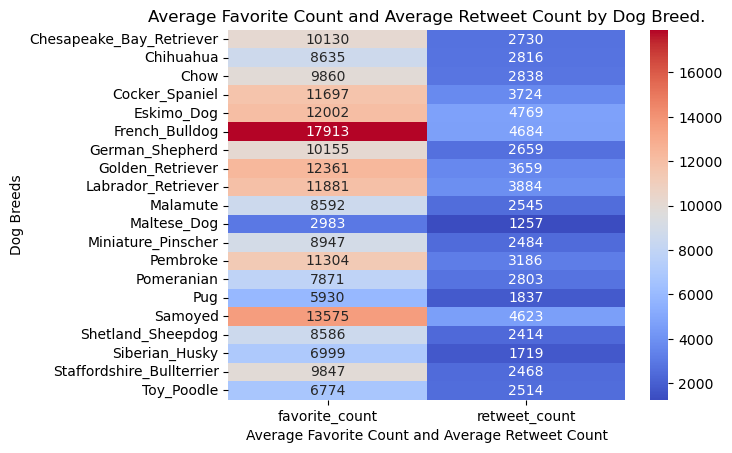

In [97]:
import seaborn as sns

top_breeds = working_df['breed_prediction'].value_counts().head(20).index.tolist()
subset = working_df[working_df['breed_prediction'].isin(top_breeds)]

pivot_table = subset.pivot_table(index='breed_prediction', values=['retweet_count', 'favorite_count'], aggfunc='mean')

heatmap = sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.0f')
heatmap.set_xlabel('Average Favorite Count and Average Retweet Count')
heatmap.set_ylabel('Dog Breeds')
heatmap.set_title('Average Favorite Count and Average Retweet Count by Dog Breed.')
plt.show()

In [98]:
correlations_by_breed = subset.groupby('breed_prediction')['retweet_count', 'favorite_count'].corr().iloc[0::2,-1]
print(correlations_by_breed)

breed_prediction                        
Chesapeake_Bay_Retriever   retweet_count    0.976868
Chihuahua                  retweet_count    0.936669
Chow                       retweet_count    0.953378
Cocker_Spaniel             retweet_count    0.921990
Eskimo_Dog                 retweet_count    0.942986
French_Bulldog             retweet_count    0.957679
German_Shepherd            retweet_count    0.959256
Golden_Retriever           retweet_count    0.923150
Labrador_Retriever         retweet_count    0.918133
Malamute                   retweet_count    0.947072
Maltese_Dog                retweet_count    0.981893
Miniature_Pinscher         retweet_count    0.912721
Pembroke                   retweet_count    0.923939
Pomeranian                 retweet_count    0.945868
Pug                        retweet_count    0.936253
Samoyed                    retweet_count    0.917259
Shetland_Sheepdog          retweet_count    0.982129
Siberian_Husky             retweet_count    0.917930
Staff

C:\Users\daiva\AppData\Local\Temp\ipykernel_18172\4126465246.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  correlations_by_breed = subset.groupby('breed_prediction')['retweet_count', 'favorite_count'].corr().iloc[0::2,-1]


The heatmap above indicates a strong positive correlation between **'retweet_count'** and **'favorite_count'** per each breed. Where a particular breed is more popular, in terms of retweets, the more it is liked, in terms of favorites. Furthermore, accoring to the heatmap, the **French Bulldog** has the highest average favorite count, whereas the **Eskimo Dog** has the highest average retweet count. 

The Pearson correlation coefficient of **'0.913'** showed a strong positive correlation between these two variables, indicating that tweets with more retweets also tend to be more favored, and vice versa.

The heatmap and correlation analysis provide an insightful look into the relationship between dog breeds, retweet counts and favorite counts in the dataset. Nonetheless, it's important to remember that correlation does not necessarily imply causation, and further investigations can be done to determine the factors that also contribute to the popularity of the different dog breeds on Twitter.